In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#path

In [ ]:
path="/content/drive/MyDrive/Tài liệu năm 4/kỳ 2/KDLVKP/BTL Của Huy"
df = pd.read_csv(path+"/2 Code/Hauu/Decision-Tree-C4.5/dataset/iris.csv")

NameError: ignored

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score ,precision_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree

# ID3 

##1 Iris

In [ ]:
# Load the dataset into a pandas dataframe
path="/content/drive/MyDrive/Tài liệu năm 4/kỳ 2/KDLVKP/BTL Của Huy"
df = pd.read_csv(path+"/2 Code/Hauu/Decision-Tree-C4.5/dataset/iris.csv")
# df = pd.read_csv("/content/drive/MyDrive/iris.csv")
def change_target_type(x):
  '''
    Chuyển đổi chuỗi trong class thành số
    input: string in column class
    output: number
  '''
  if x == 'Iris-setosa':
    return 0

  elif x == 'Iris-versicolor':
    return 1
  
  elif x == 'Iris-virginica':
    return 2

# use .apply() để áp dụng hàm change_target_type vào trong cột class ở dataframe
df.loc[:,"class"] = df["class"].apply(change_target_type)

# sử dụng hàm df.keys() để lấy tên các thuộc tính
attrs = df.keys()[:-1]

# tách tập dữ liệu thành hai phần: tập huấn luyện và tập kiểm tra
X_total = df[attrs]  # tập các thuộc tính
y_total = df.iloc[:,-1]  # tập nhãn

# đặt giá trị random_state = 48 (random seed) để đảm bảo phân chia giữa tập huấn luyện và tập kiểm tra luôn giống nhau
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size=0.2, random_state=48)

# Create a decision tree classifier object with ID3 algorithm
clf = DecisionTreeClassifier(criterion="entropy")

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")
precision = precision_score(y_test, y_pred, average="macro")

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-score:", f1)
print("Precision:", precision)


Accuracy: 0.9
Recall: 0.9060606060606061
F1-score: 0.9047619047619048
Precision: 0.9060606060606061


<ipython-input-17-da3cf9e14aed>:21: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,"class"] = df["class"].apply(change_target_type)


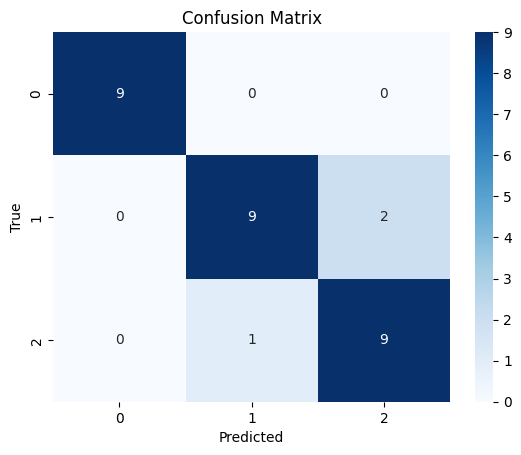

In [ ]:
# Tạo confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Vẽ confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

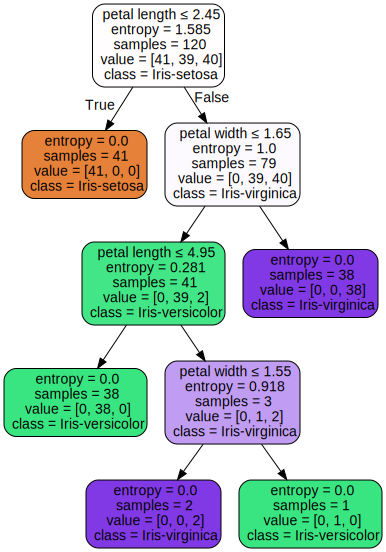

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                           feature_names=attrs,  
                           class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],  
                           filled=True, rounded=True,  
                           special_characters=True)

graph = graphviz.Source(dot_data, format="png")
graph

##2 Transfusion

In [21]:
# Load the dataset into a pandas dataframe
# df1 = pd.read_csv("/content/drive/MyDrive/transfusion.csv")
path="/content/drive/MyDrive/Tài liệu năm 4/kỳ 2/KDLVKP/BTL Của Huy"
df1 = pd.read_csv(path+"/2 Code/Hauu/Decision-Tree-C4.5/dataset/transfusion.csv")
# sử dụng hàm df.keys() để lấy tên các thuộc tính
attrs = df1.keys()[:-1]

# tách tập dữ liệu thành hai phần: tập huấn luyện và tập kiểm tra
X_total = df1[attrs]  # tập các thuộc tính
y_total = df1.iloc[:,-1]  # tập nhãn

# đặt giá trị random_state = 48 (random seed) để đảm bảo phân chia giữa tập huấn luyện và tập kiểm tra luôn giống nhau
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size=0.2, shuffle=False)

# Create a decision tree classifier object with ID3 algorithm
clf = DecisionTreeClassifier(criterion="entropy",random_state=48)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")
precision = precision_score(y_test, y_pred, average="macro")

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-score:", f1)
print("Precision:", precision)

Accuracy: 0.8066666666666666
Recall: 0.44485294117647056
F1-score: 0.4464944649446494
Precision: 0.44814814814814813


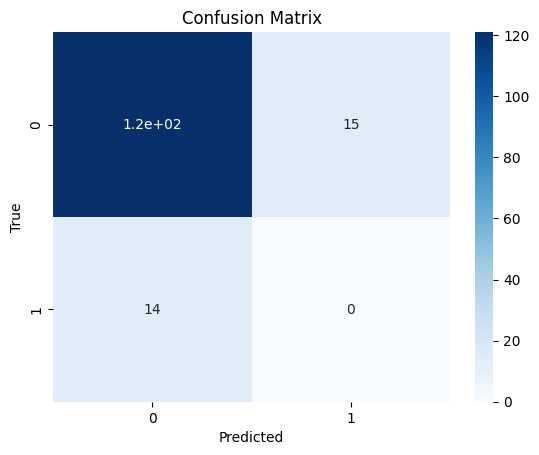

In [ ]:
# Tạo confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Vẽ confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

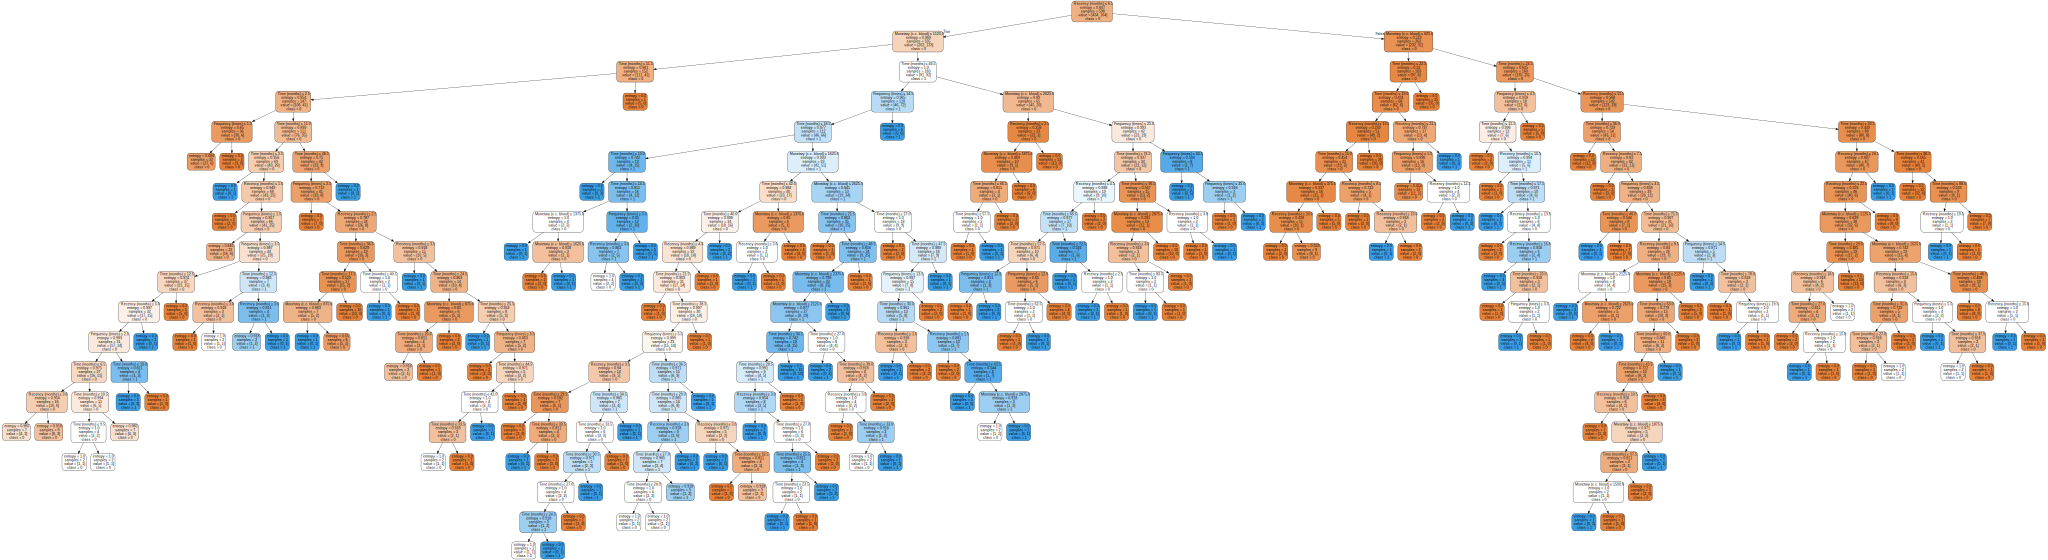

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                           feature_names=attrs,  
                           class_names=["0", "1"],  
                           filled=True, rounded=True,  
                           special_characters=True)

graph = graphviz.Source(dot_data, format="png")
graph

##3 Winequality-red

In [17]:
# Load the dataset into a pandas dataframe
# df2 = pd.read_csv("/content/drive/MyDrive/winequality-red.csv")

path="/content/drive/MyDrive/Tài liệu năm 4/kỳ 2/KDLVKP/BTL Của Huy"
df2 = pd.read_csv(path+"/2 Code/Hauu/Decision-Tree-C4.5/dataset/winequality-red.csv")

# Here I randomly select 750 samples of the total
# df2 = df2.sample( random_state=50, axis=0)

def change_target_type(x):
  if x > 6.5:
    # return 'good'
    return 1

  else:
    # return 'not good'
    return 0

df2.loc[:,"quality"] = df2["quality"].apply(change_target_type)

# sử dụng hàm df.keys() để lấy tên các thuộc tính
attrs = df2.keys()[:-1]

# tách tập dữ liệu thành hai phần: tập huấn luyện và tập kiểm tra
X_total = df2[attrs]  # tập các thuộc tính
y_total = df2.iloc[:,-1]  # tập nhãn

# đặt giá trị random_state = 48 (random seed) để đảm bảo phân chia giữa tập huấn luyện và tập kiểm tra luôn giống nhau
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size=0.2, shuffle=False)

# Create a decision tree classifier object with ID3 algorithm
clf = DecisionTreeClassifier(criterion="entropy",random_state = 42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")
precision = precision_score(y_test, y_pred, average="macro")

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-score:", f1)
print("Precision:", precision)


Accuracy: 0.85625
Recall: 0.6108474576271187
F1-score: 0.5892398705212636
Precision: 0.5780727724190622


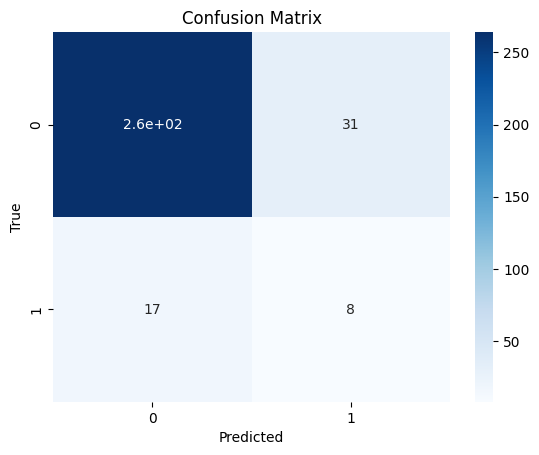

In [4]:
# Tạo confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Vẽ confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

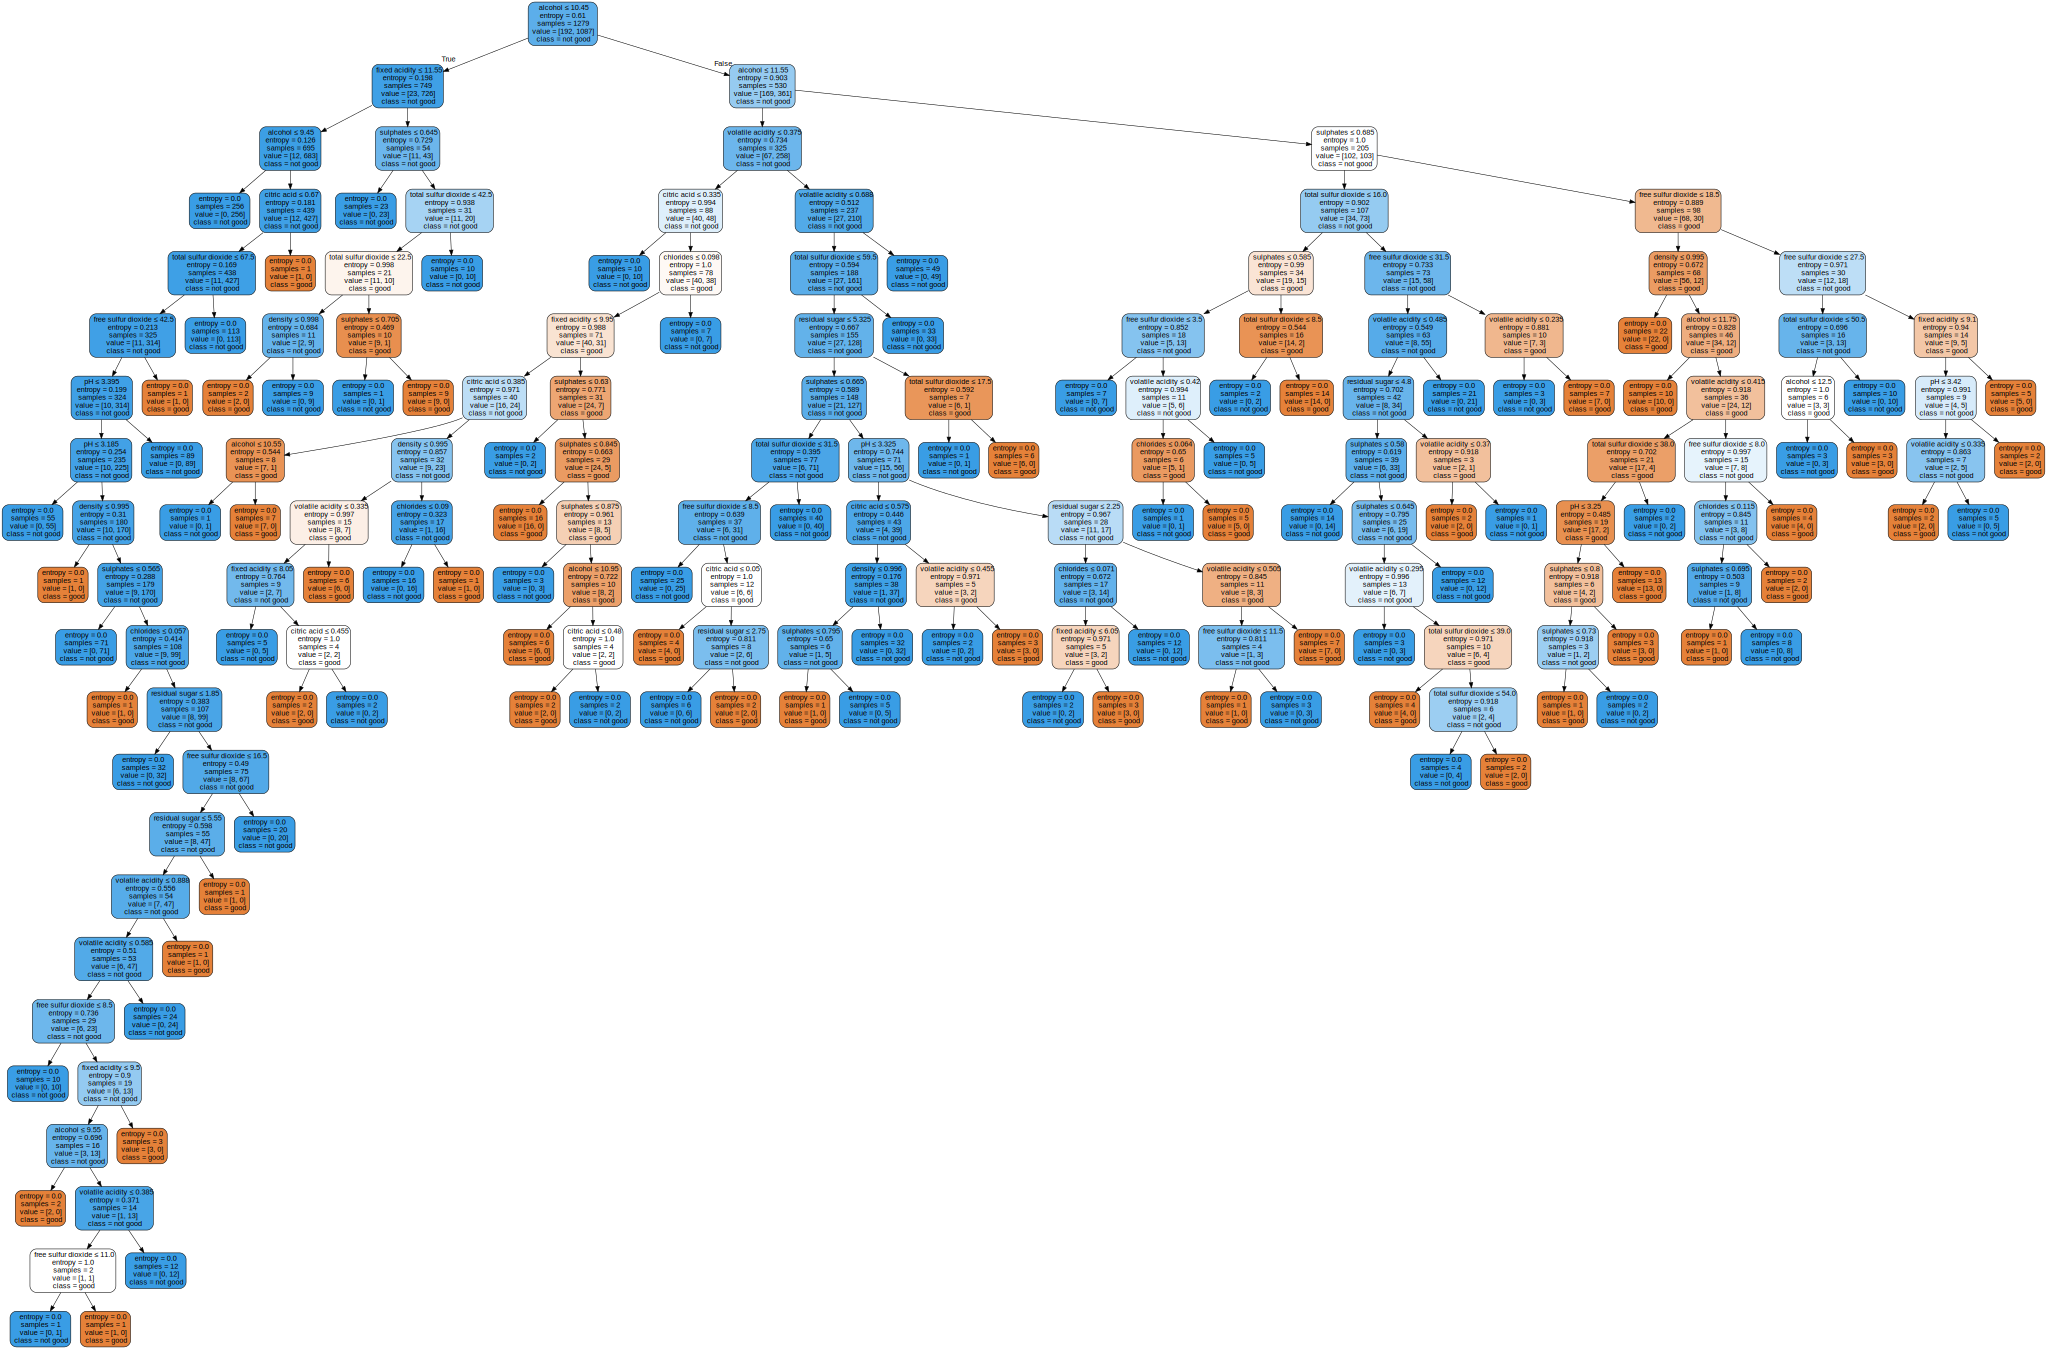

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                           feature_names=attrs,  
                           class_names=["good", "not good"],  
                           filled=True, rounded=True,  
                           special_characters=True)

graph = graphviz.Source(dot_data, format="png")
graph

# Gini


##1 Iris

In [ ]:
# Load the dataset into a pandas dataframe
# df3 = pd.read_csv("/content/drive/MyDrive/iris.csv")
path="/content/drive/MyDrive/Tài liệu năm 4/kỳ 2/KDLVKP/BTL Của Huy"
df3 = pd.read_csv(path+"/2 Code/Hauu/Decision-Tree-C4.5/dataset/iris.csv")

def change_target_type(x):
  '''
    Chuyển đổi chuỗi trong class thành số
    input: string in column class
    output: number
  '''
  if x == 'Iris-setosa':
    return 0

  elif x == 'Iris-versicolor':
    return 1
  
  elif x == 'Iris-virginica':
    return 2

# use .apply() để áp dụng hàm change_target_type vào trong cột class ở dataframe
df3.loc[:,"class"] = df3["class"].apply(change_target_type)

# sử dụng hàm df.keys() để lấy tên các thuộc tính
attrs = df3.keys()[:-1]

# tách tập dữ liệu thành hai phần: tập huấn luyện và tập kiểm tra
X_total = df3[attrs]  # tập các thuộc tính
y_total = df3.iloc[:,-1]  # tập nhãn

# đặt giá trị random_state = 48 (random seed) để đảm bảo phân chia giữa tập huấn luyện và tập kiểm tra luôn giống nhau
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size=0.2, random_state=48)

# Create a decision tree classifier object with ID3 algorithm
clf = DecisionTreeClassifier(criterion="gini")

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")
precision = precision_score(y_test, y_pred, average="macro")

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-score:", f1)
print("Precision:", precision)


Accuracy: 0.9
Recall: 0.9060606060606061
F1-score: 0.9047619047619048
Precision: 0.9060606060606061


<ipython-input-9-480057d4ceb2>:22: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df3.loc[:,"class"] = df3["class"].apply(change_target_type)


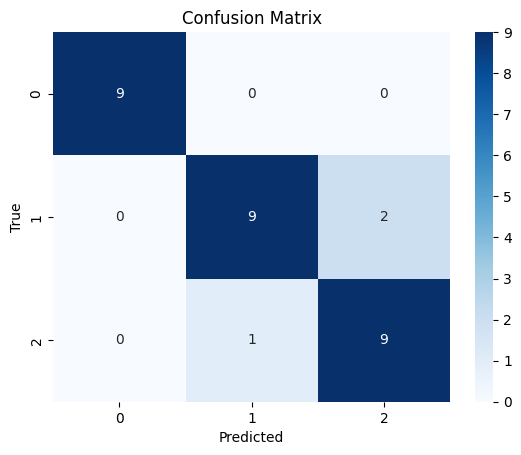

In [ ]:
# Tạo confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Vẽ confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

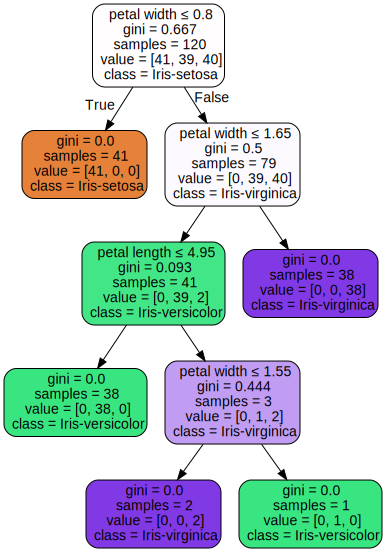

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                           feature_names=attrs,  
                           class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],  
                           filled=True, rounded=True,  
                           special_characters=True)

graph = graphviz.Source(dot_data, format="png")
graph

##2 Transfusion

In [ ]:
# Load the dataset into a pandas dataframe
# df4 = pd.read_csv("/content/drive/MyDrive/transfusion.csv")

path="/content/drive/MyDrive/Tài liệu năm 4/kỳ 2/KDLVKP/BTL Của Huy"
df4 = pd.read_csv(path+"/2 Code/Hauu/Decision-Tree-C4.5/dataset/transfusion.csv")
# sử dụng hàm df.keys() để lấy tên các thuộc tính
attrs = df4.keys()[:-1]

# tách tập dữ liệu thành hai phần: tập huấn luyện và tập kiểm tra
X_total = df4[attrs]  # tập các thuộc tính
y_total = df4.iloc[:,-1]  # tập nhãn

# đặt giá trị random_state = 48 (random seed) để đảm bảo phân chia giữa tập huấn luyện và tập kiểm tra luôn giống nhau
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size=0.2,shuffle=False)

# Create a decision tree classifier object with ID3 algorithm
clf = DecisionTreeClassifier(criterion="gini",random_state = 48)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")
precision = precision_score(y_test, y_pred, average="macro")

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-score:", f1)
print("Precision:", precision)

Accuracy: 0.8066666666666666
Recall: 0.44485294117647056
F1-score: 0.4464944649446494
Precision: 0.44814814814814813


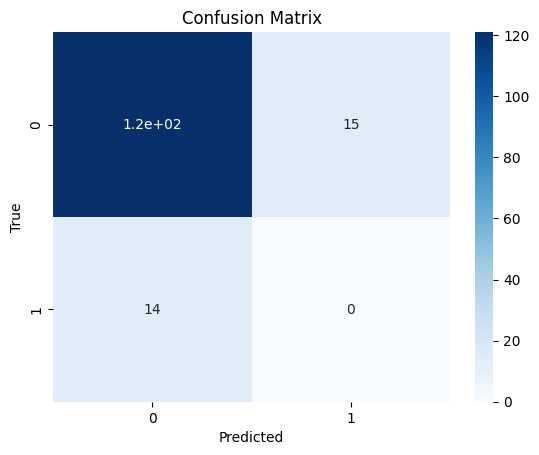

In [ ]:
# Tạo confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Vẽ confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

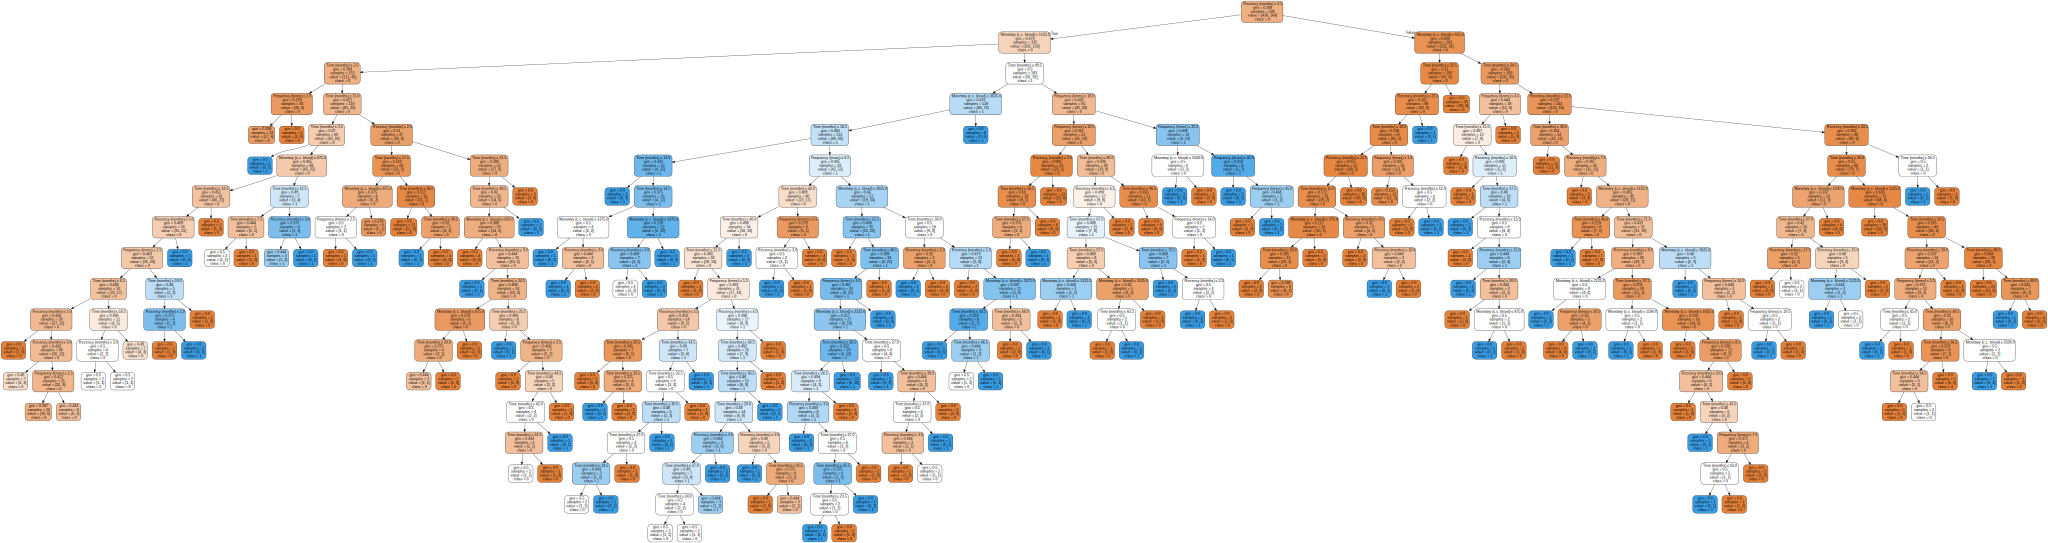

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                           feature_names=attrs,  
                           class_names=["0", "1"],  
                           filled=True, rounded=True,  
                           special_characters=True)

graph = graphviz.Source(dot_data, format="png")
graph

##3 Winequality-red

In [24]:
# Load the dataset into a pandas dataframe
# df5 = pd.read_csv("/content/drive/MyDrive/winequality-red.csv")

path="/content/drive/MyDrive/Tài liệu năm 4/kỳ 2/KDLVKP/BTL Của Huy"
df5 = pd.read_csv(path+"/2 Code/Hauu/Decision-Tree-C4.5/dataset/winequality-red.csv")

# Here I randomly select 750 samples of the total
# df5 = df5.sample(n=750, random_state=50, axis=0)

def change_target_type(x):
  if x > 6.5:
    # return 'good'
    return 1

  else:
    # return 'not good'
    return 0

df5.loc[:,"quality"] = df5["quality"].apply(change_target_type)

# sử dụng hàm df.keys() để lấy tên các thuộc tính
attrs = df5.keys()[:-1]

# tách tập dữ liệu thành hai phần: tập huấn luyện và tập kiểm tra
X_total = df5[attrs]  # tập các thuộc tính
y_total = df5.iloc[:,-1]  # tập nhãn

# đặt giá trị random_state = 48 (random seed) để đảm bảo phân chia giữa tập huấn luyện và tập kiểm tra luôn giống nhau
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size=0.2, shuffle=False)

# Create a decision tree classifier object with ID3 algorithm
clf = DecisionTreeClassifier(criterion="gini", random_state=48)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")
precision = precision_score(y_test, y_pred, average="macro")

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-score:", f1)
print("Precision:", precision)


Accuracy: 0.8875
Recall: 0.6827118644067797
F1-score: 0.6587273373622468
Precision: 0.6422764227642276


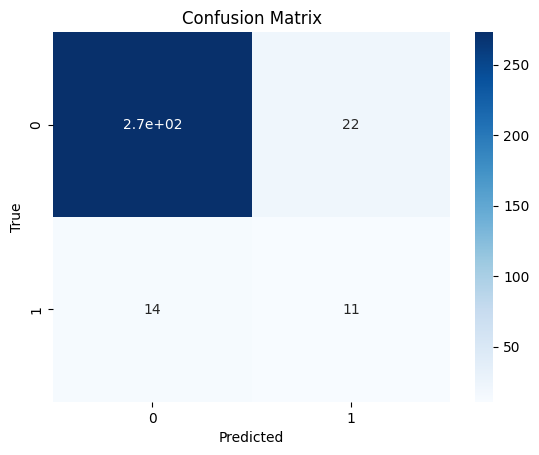

In [6]:
# Tạo confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Vẽ confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

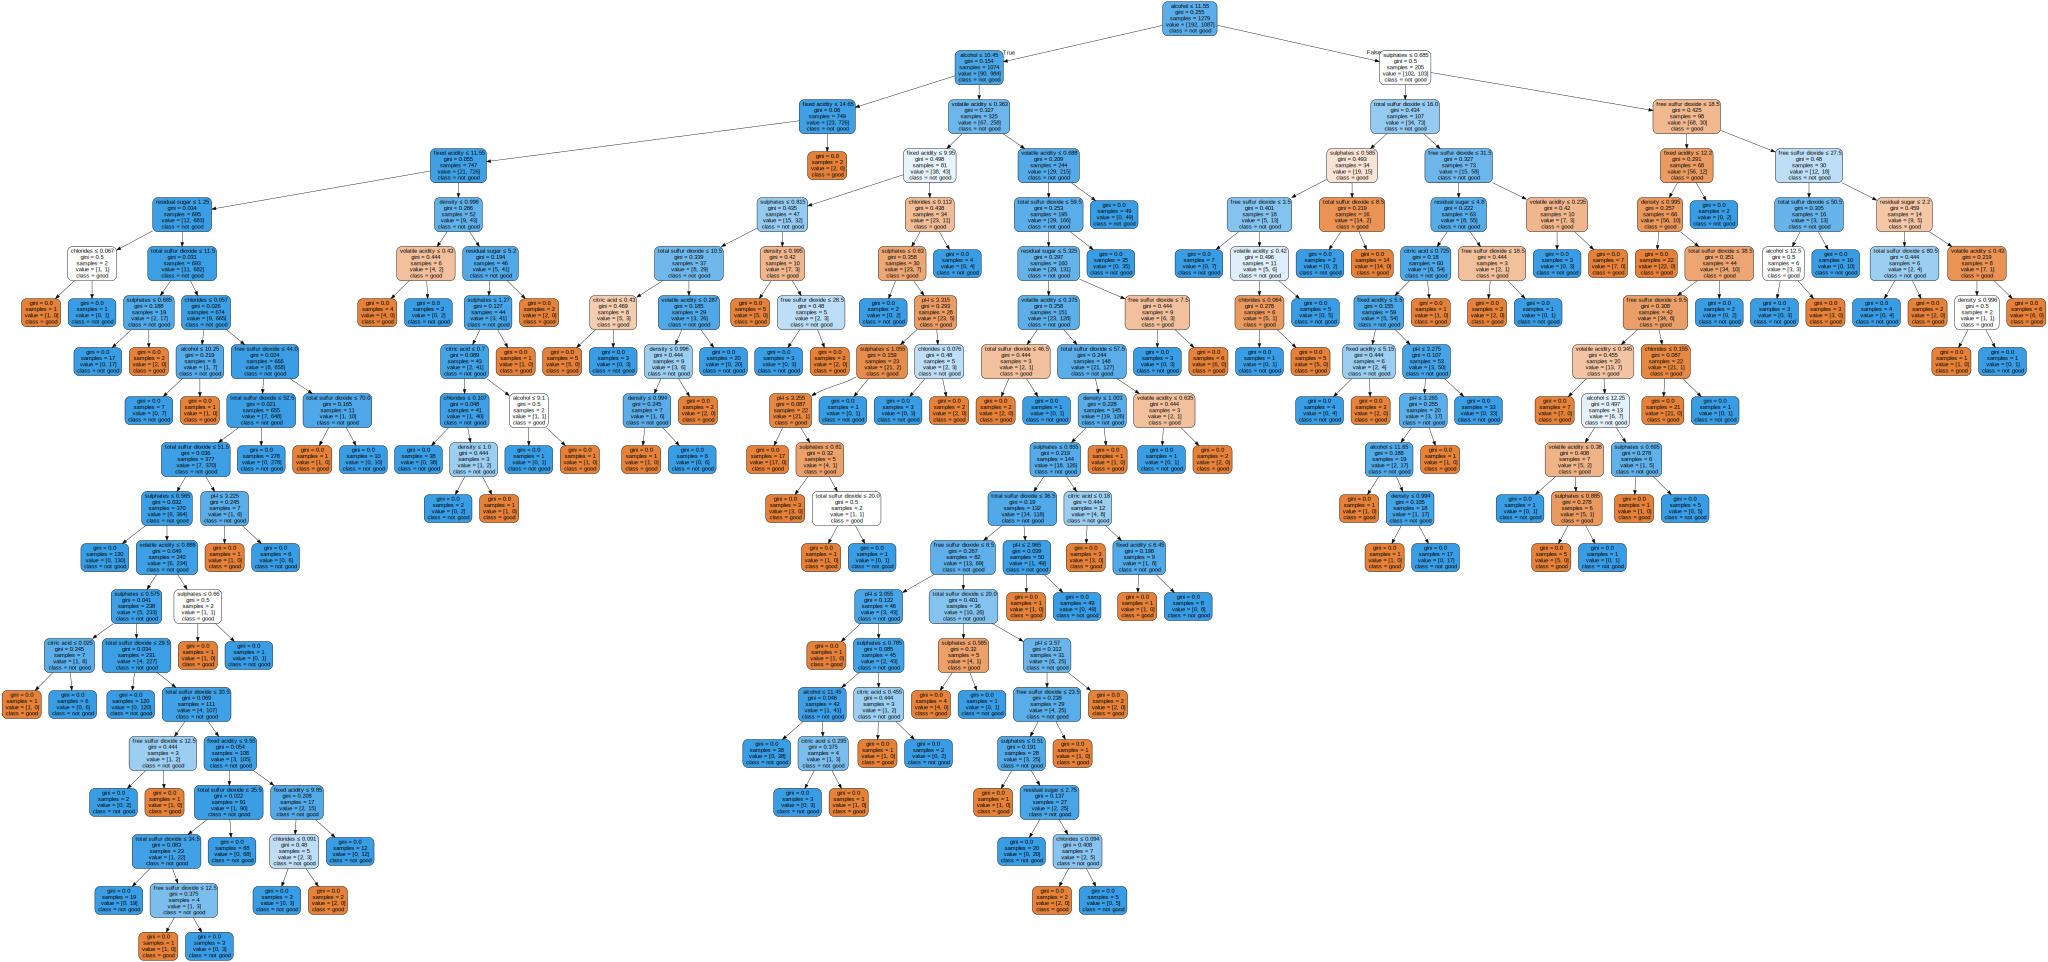

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                           feature_names=attrs,  
                           class_names=["good", "not good"],  
                           filled=True, rounded=True,  
                           special_characters=True)

graph = graphviz.Source(dot_data, format="png")
graph